In [1]:
# packages
import numpy as np 
import matplotlib.pyplot as plt
import os
from scipy import integrate
from scipy.stats import norm

import astropy.coordinates as coord
import astropy.units as u
from scipy import integrate, optimize
import pandas as pd
pd.set_option('display.max_columns', None)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import astropy.units as u

# graphic parameters
plt.rcParams['font.size'] = 19
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
plt.rcParams['axes.linewidth']  = 1.4
plt.rcParams['figure.figsize']  = (8, 4)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 1.8
plt.rcParams['ytick.major.width'] = 1.8   
plt.rcParams['lines.markeredgewidth'] = 2

# defining a numpy seed for random
np.random.seed(0)

# creating a folder to save the plots
pltpath = 'plots/'
if not os.path.exists(pltpath):
    os.makedirs(pltpath)
dpi      = 450     # resolution of saved images
formatIm = '.png'  # format of saved images

# ----- some constants ----- #
G     = 6.6743e-8     # gravitational constant
kb    = 1.3807e-16    # Boltzmann constant
sigma = 5.67e-5       # Stefan-Boltzmann constant
Msun  = 1.9884e33     # sun mass
Rsun  = 6.957e10      # sun radius
m_H   = 1.6726e-24    # mass of the proton/hydrogen
m_e   = 9.1094e-28    # mass of the electron
c     = 2.9979e10     # speed of light
Na    = 6.022140e22   # avogadro number
aRad  = 7.5657e-15    # radiation constant
hPl   = 6.6261e-27    # planck constant
ech   = 4.8032e-10    # electron charge
hbar  = 1.0546e-27

In [4]:
gamma_data = pd.read_csv('/home/juan/Desktop/TFM/graphs/ms_pulsars/gamma.csv', header=None)
xray_data  = pd.read_csv('/home/juan/Desktop/TFM/graphs/ms_pulsars/xray.csv', header=None)
optic_data = pd.read_csv('/home/juan/Desktop/TFM/graphs/ms_pulsars/optical.csv', header=None)
radio_data = pd.read_csv('/home/juan/Desktop/TFM/graphs/ms_pulsars/radio.csv', header=None)

gamma_x, gamma_y = gamma_data[0], gamma_data[1]
xray_x, xray_y   = xray_data[0], xray_data[1]
optic_x, optic_y = optic_data[0], optic_data[1]
radio_x, radio_y = radio_data[0], radio_data[1]

num_puls = 7

lims = [-10, 1.05, 2.16, 3.27, 4.37, 5.47, 6.58, 10]

In [52]:
def extract(gamma_x, gamma_y, lims):
    G, yG = [], []

    for i in range(num_puls):

        x, y = [], []

        for j in range(len(gamma_x)):
            if (gamma_x[j] >= lims[i]) and (gamma_x[j] <= lims[i+1]): 

                x.append(gamma_x[j])
                y.append(gamma_y[j])

        if len(x) <= 1:
            x = np.linspace(0, 1, 100)
            y = np.zeros(100)
        else:
            x = (np.array(x)-np.min(x)) / np.max(np.array(x)-np.min(x))
            y = np.array(y) / np.max(y)

        G.append(x)
        yG.append(y)
        
    return G, yG

G, yG = extract(gamma_x, gamma_y, lims)
X, yX = extract(xray_x,  xray_y,  lims)
O, yO = extract(optic_x, optic_y, lims)
R, yR = extract(radio_x, radio_y, lims)

In [53]:
yG[-3] = yG[-3] * 0.7
yG[-1] = yG[-1] * 0.7

yX[-2] = yX[-2] * 0.7
yX[-1] = yX[-1] * 0.7

yR[-3] = yR[-3] * 0.4
yR[-1] = yR[-1] * 0.5

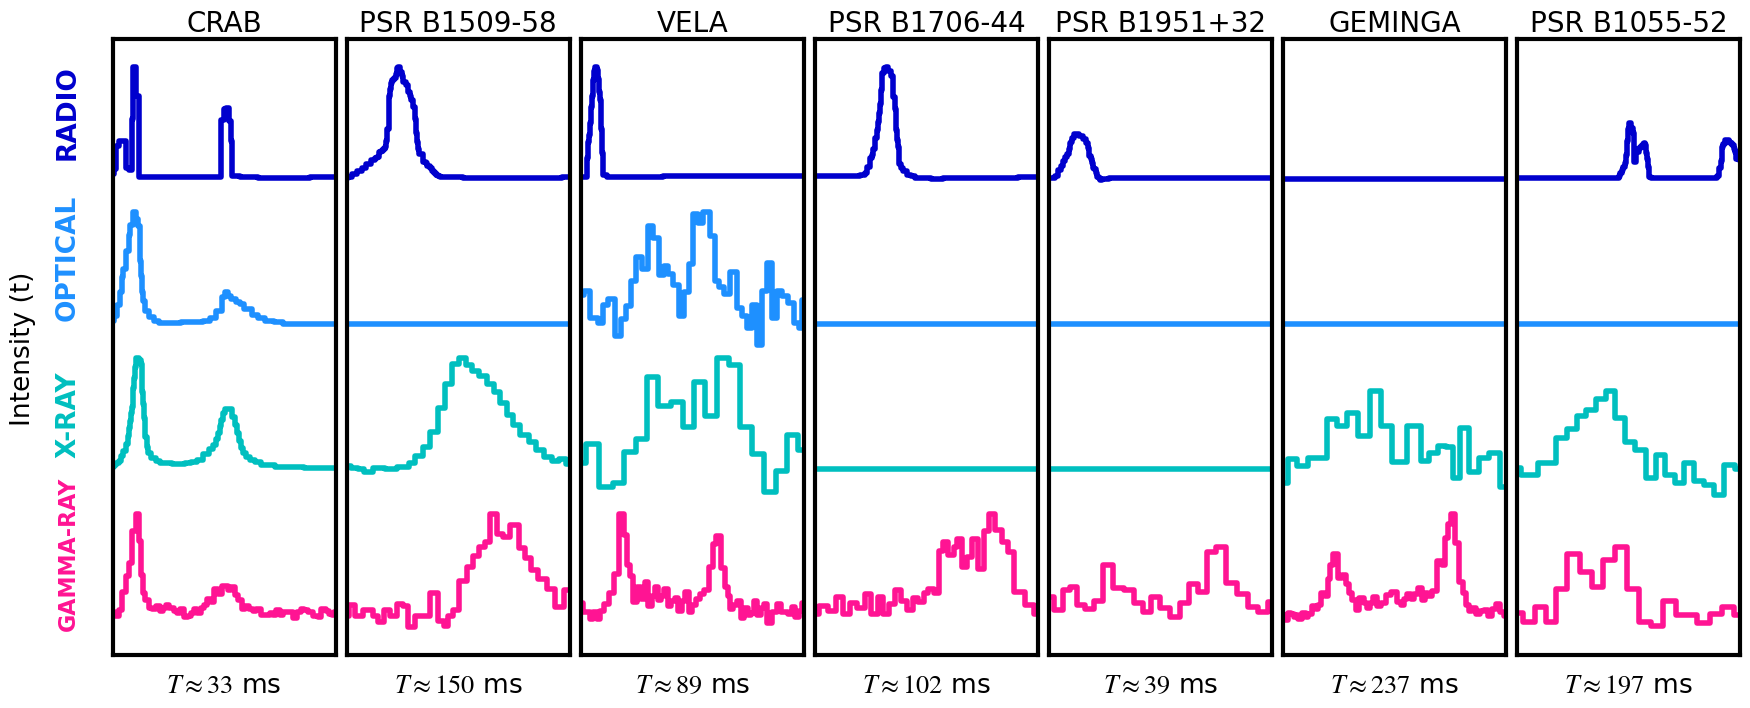

In [66]:
cc = '#FFBB00'
col = [ 'deeppink', 'c', 'dodgerblue','mediumblue']


fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1, 7, figsize=(21, 8), sharex=True, sharey=True)

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]
titles = ['CRAB', 'PSR B1509-58', 'VELA', 'PSR B1706-44', 'PSR B1951+32', 'GEMINGA', 'PSR B1055-52']

lab = ['$T\\approx 33$ ms', '$T\\approx 150$ ms', '$T\\approx 89$ ms', '$T\\approx 102$ ms', '$T\\approx 39$ ms', '$T\\approx 237$ ms', '$T\\approx 197$ ms']


for ax, i in zip(axes, range(len(axes))):
    ax.plot(G[i], yG[i] - 0.1, ds='steps-mid', c=col[0], lw=4)
    ax.plot(X[i], yX[i] + 1.3, ds='steps-mid', c=col[1], lw=4)
    ax.plot(O[i], yO[i] + 2.6, ds='steps-mid', c=col[2], lw=4)
    ax.plot(R[i], yR[i] + 3.9, ds='steps-mid', c=col[3], lw=4)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_title(titles[i], fontsize=20)
    ax.set_xlim(0,1)
    ax.set_xlabel(lab[i])
    [x.set_linewidth(3) for x in ax.spines.values()]
    
fig.subplots_adjust(wspace=0.05, hspace=0)

ax1.set_ylabel('Intensity (t)\n\n')

ax1.text(-0.2, 0.55,'GAMMA-RAY', rotation=90, color=col[0], ha='center', va='center', weight='bold', fontsize=16)
ax1.text(-0.2, 1.8, 'X-RAY',     rotation=90, color=col[1], ha='center', va='center', weight='bold')
ax1.text(-0.2, 3.2, 'OPTICAL',   rotation=90, color=col[2], ha='center', va='center', weight='bold')
ax1.text(-0.2, 4.5, 'RADIO',     rotation=90, color=col[3], ha='center', va='center', weight='bold')



plt.savefig(f'{pltpath}ms-pusar-profiles{formatIm}', bbox_inches='tight', dpi=dpi)
plt.show()